# BPY518 Lecture 1: Digital Images
Instructor: Josh Shaevitz  
Email: shaevitz@princeton.edu

## Lecture Outline
- Digital images
- Plotting an image
- Line scans and distributions
- Thresholding/masking
- Image stacks
- 3D Data and Projections
- Multicolor images

## FIJI (ImageJ) vs Python

**FIJI/ImageJ**
![fiji.png](media/Lecture_1/fiji.png)
- Useful tool for quickly inspecting images.
- Supports scripting but not as flexible as Python.

**Python**
![python.png](media/Lecture_1/python.png)

- General-purpose language.
- Great for combining image analysis with data analysis.
- Used for homework in this course.

## Typical Image Analysis Pipeline

![pipeline.png](media/Lecture_1/pipeline.png)

## A Digital Image is an Array of Numbers

![face.png](media/Lecture_1/face.png)

## A Digital Image is an Array of Numbers

![eights.png](media/Lecture_1/eights.png)

## Opening and Displaying in Python

Like most things in coding, there are MANY ways to do this…

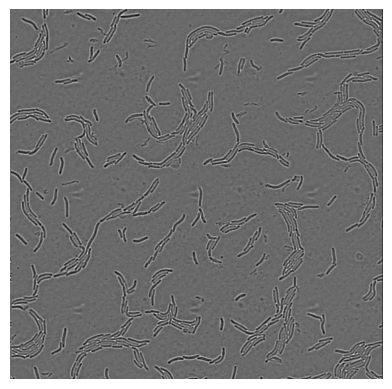

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the image and convert to grayscale if needed
image = mpimg.imread("media/Lecture_1/MyxoImage.tif")

# Display the image
plt.imshow(image, cmap='gray')
plt.axis("off")  # Hide axis
plt.show()

## Image Statistics

Just treat the image as a normal array

In [75]:
import numpy as np

# Calculate image statistics
min_pixel = np.min(image)
max_pixel = np.max(image)
variance = np.var(image)
num_pixels = image.size  # Total number of pixels
num_rows, num_cols = image.shape  # Dimensions of the image

print(f"Min pixel value: {min_pixel}")
print(f"Max pixel value: {max_pixel}")
print(f"Variance: {variance}")
print(f"Total number of pixels: {num_pixels}")
print(f"Image dimensions: {num_rows} rows x {num_cols} cols")

Min pixel value: 0
Max pixel value: 255
Variance: 367.19686995127785
Total number of pixels: 522000
Image dimensions: 720 rows x 725 cols


## Plotting an Instensity Histogram

We will find intensity histograms very useful

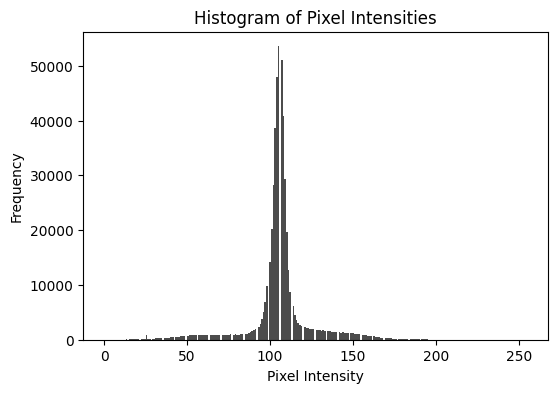

In [76]:
# Plot histogram of pixel intensities
plt.figure(figsize=(6,4))
plt.hist(image.ravel(), bins=256, range=(0, 255), color='black', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Intensities")
plt.show()

## A Line Profile is a 1D Vector

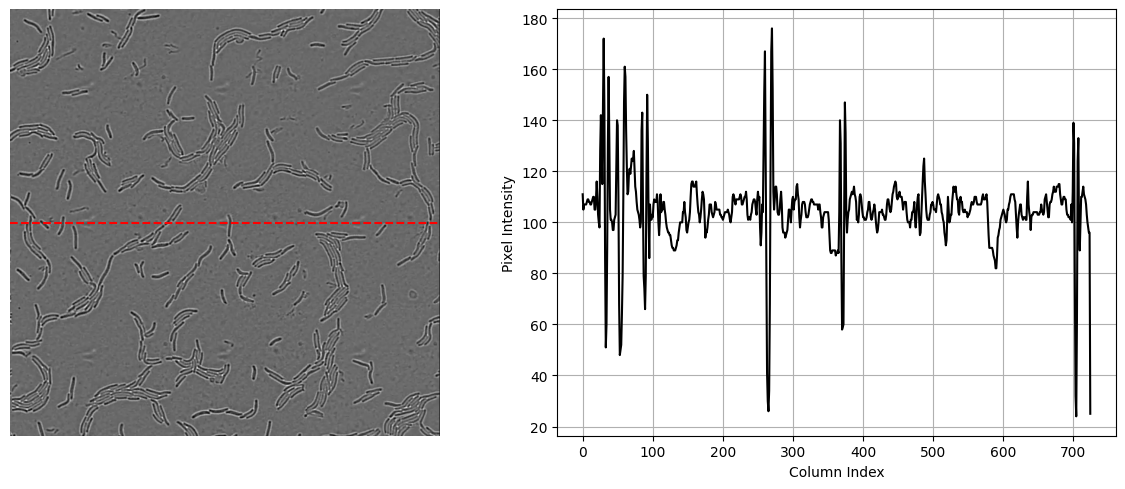

In [77]:
# Extract the middle row
middle_row = num_rows // 2
line_profile = image[middle_row, :]

# Plot the image and the line profile side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Display the image with the line on top
axes[0].imshow(image, cmap="gray")
axes[0].axhline(y=middle_row, color='red', linestyle='--', linewidth=1.5)
axes[0].axis("off")

# Plot the horizontal line profile
axes[1].plot(line_profile, color='black')
axes[1].set_xlabel("Column Index")
axes[1].set_ylabel("Pixel Intensity")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Pixel and Image Sizes

Camera pixel size + magnification (objective+projection)

- Use microscope metadata or calibration images to determine pixel size.
- To measure the calibration yourself:
  - Take a picture of a ruler/grid of known size
  - ![](2025-05-29-10-25-27.png)Move a calibrated stage and track the image
![pixelsize](media/Lecture_1/pixelsize.png)

## Always Add a Scale Bar!

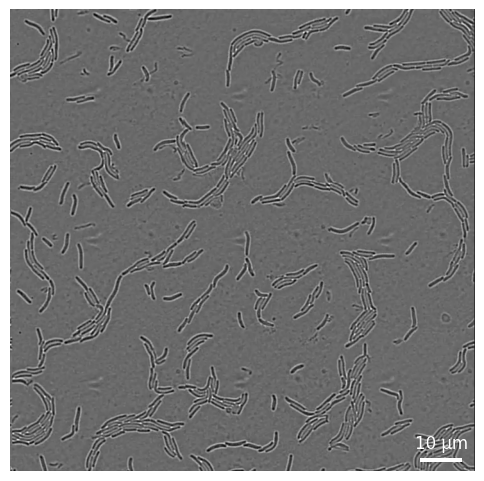

In [78]:
import matplotlib.patches as patches

# Image dimensions
height, width = image.shape

# Scale bar properties
pixel_size_nm = 150  # Pixel size in nanometers
scale_bar_length_um = 10  # Desired scale bar length in microns
scale_bar_length_pixels = int((scale_bar_length_um * 1000) / pixel_size_nm)
scale_bar_text = f"{scale_bar_length_um} μm"
bar_x = width - scale_bar_length_pixels - 20  # 20 pixels from the right
bar_y = height - 20  # 20 pixels from the bottom

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap="gray")
ax.axis("off")

# Add scale bar (white rectangle)
scale_bar = patches.Rectangle((bar_x, bar_y), scale_bar_length_pixels, 5,
                             color="white", lw=0)  # 5-pixel height
ax.add_patch(scale_bar)

# Add scale bar label
ax.text(bar_x + scale_bar_length_pixels / 2, bar_y - 10, scale_bar_text,
        color="white", fontsize=12, ha="center", va="bottom")

plt.show()

## Thresholding Images

In many instances, we will want to make a “binary image mask”, i.e. an image of 0’s and 1’s. This is typically done via “thresholding” the background (to 0) from the signal (to 1).

You can use a boolean operation to make the mask:


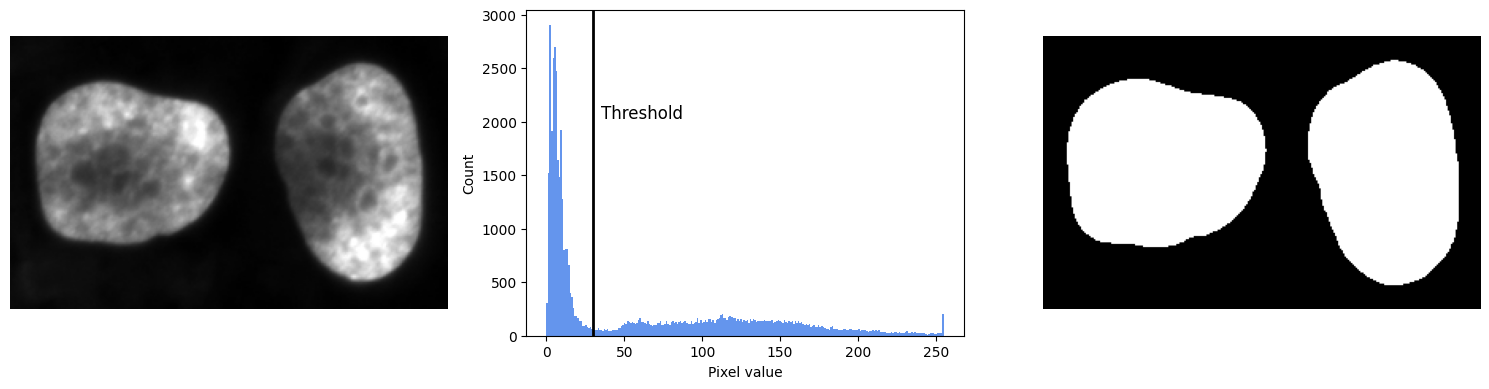

In [79]:
image = mpimg.imread("media/Lecture_1/cellsforthreshold.tif")

thresh = 30
binary = image > thresh # Create binary mask based on threshold

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(image, cmap='gray')
axes[0].set_axis_off()

hist_vals, bins, _ = axes[1].hist(image.ravel(), bins=256, color='cornflowerblue')
axes[1].axvline(thresh, color='k', linestyle='-', linewidth=2)
axes[1].text(thresh+5, max(hist_vals)*0.7, "Threshold", rotation=0, fontsize=12)
axes[1].set_xlabel("Pixel value"); axes[1].set_ylabel("Count")
axes[2].imshow(binary, cmap='gray')
axes[2].set_axis_off()

plt.tight_layout()
plt.show()

## Thresholding Methods
- By eye…
- Mean method: threshold at the mean of the intensity values
- Otsu’s method
- Valley method
- Triangle method

## Otsu's Method

Minimize intra-class variance/Maximize inter-class variance. Works well on a bimodal intensity distribution

![Otsu's Method](media/Lecture_1/Otsu_Method.gif)


## Valley Method

Assume a bimodal distribution and find the minimum between the (smoothed) histogram peaks.

![valleymethod](media/Lecture_1/valley_method.png)

## Triangle Method

Draw a line between the peak in the histogram and the last bin with counts. Threshold at the farthest point in the histogram from the line.

![trianglemethod](media/Lecture_1/triangle_method.png)

## Global vs Local Thresholding

- Global threshold (the same everywhere) works if the intensity/illumination is similar everywhere
- If not, you need to use a local threshold, calculated over small regions in the image, i.e. over a sliding NxN pixel window

![globallocal](media/Lecture_1/globallocalthresh.png)

## Multiple Images as 3=(2+1)D Stacks

Usually stored as a Multi-page TIFF file, Analyzed as a 3D array

**Dimensions**
- *z*-dimension: $(x,y,x)$
- color: Fluorescence channels, $(x,y,\lambda)$
- time: $(x,y,t)$

![stack](media/Lecture_1/stack.jpg)

## Each Layer of a Stack is an Image

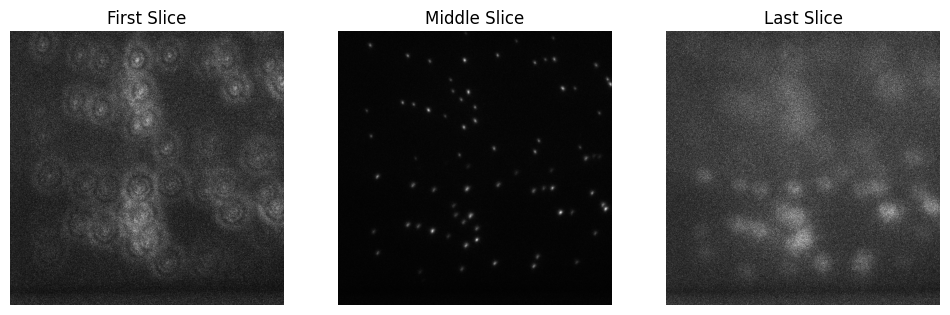

In [58]:
import tifffile as tiff

# Load the 3D image stack
stack = tiff.imread("media/Lecture_1/Biplane_Calibration_80x80x100nm.tif")

# Get the number of slices (Z), height (Y), and width (X)
num_slices, height, width = stack.shape

first_slice = 0
middle_slice = num_slices // 2
last_slice = num_slices - 1

# Display the first, middle, and last slices
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(stack[first_slice], cmap="gray")
axes[0].set_title("First Slice")
axes[0].axis("off")

axes[1].imshow(stack[middle_slice], cmap="gray")
axes[1].set_title("Middle Slice")
axes[1].axis("off")

axes[2].imshow(stack[last_slice], cmap="gray")
axes[2].set_title("Last Slice")
axes[2].axis("off")

plt.show()

## Line Scans Are Useful in Z As Well

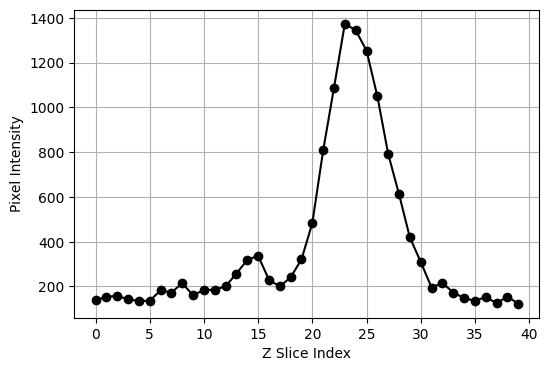

In [70]:
# Extract a Z-line scan through the middle of the (x, y) plane
mid_x = width // 2
mid_y = height // 2
z_line_scan = stack[:, 295, 241]

# Plot the Z-line scan
plt.figure(figsize=(6, 4))
plt.plot(z_line_scan, marker="o", color="black", linestyle="-")
plt.xlabel("Z Slice Index")
plt.ylabel("Pixel Intensity")
plt.grid(True)
plt.show()

## You Can Investigate Single 2D "Slices"

![slicesviews](media/Lecture_1/sliceviews.png)

## Z Projections

You can investigate a whole image stack by projecting along one axis

Try Mean, Median, etc for the projection, why would you choose one or the other?

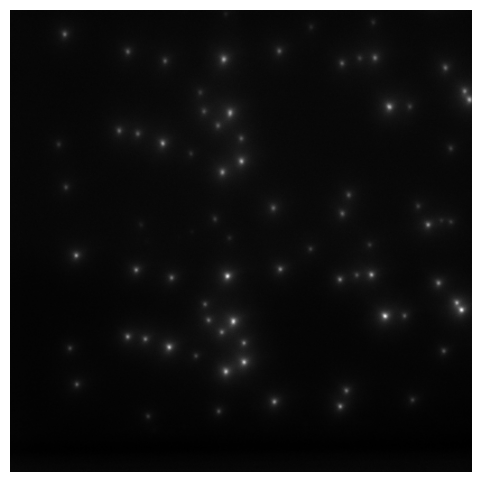

In [73]:
mean_projection = np.mean(stack, axis=0)

# Display the mean Z-projection
plt.figure(figsize=(6, 6))
plt.imshow(mean_projection, cmap="gray")
plt.axis("off")
plt.show()

## You Can Project in Any Dimension

![projections](media/Lecture_1/projections.png)

## Image Stacks in FIJI

A very useful tool for quick inspection

![FIJIstack](media/Lecture_1/FIJIstack.png)

## Image Stacks in FIJI

![FIJIstack](media/Lecture_1/FIJImenu.png)

## Color Images

Are just multiple single-color images...

- A “color camera” (like your cell phone) takes a picture with a sensor like this, each pixel senses one color (R,G,B)
- We don’t use these in microscopy.
- Your color images will be COMPOSITES, made of multiple monochromatic images acquired separately
- You can load them into a 3D array (stack) if you want, but they are just independent 2D arrays

![bayer](media/Lecture_1/bayer.png)

## Color Images

![lambdastack](media/Lecture_1/lambdastack.jpg)

## Multicolor Image Composites

![multicolor](media/Lecture_1/multicolor.png)

![multicolor2](media/Lecture_1/multicolor2.png)

## Beware Multicolor Images

Your eyes can deceive you ...

![contrast](media/Lecture_1/contrast.png)

**The two circles are the same color!**

## Color Stacks in FIJI

![FIJIcolor](media/Lecture_1/FIJIcolor.png)

## 4D data: Color + 3D $(x,y,z,\lambda)$

just more dimensions to your array!

![4d](media/Lecture_1/4d.png)

## 5D Data: $(x,y,z,\lambda,t)$

even more dimensions...

![mitosis movie](media/Lecture_1/mitosis.gif)